In [50]:
import sys
import joblib
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

sys.path.append('../..')
from independence_test.evaluate_time import N_SAMPLES, DIM
%matplotlib inline

In [104]:
results

defaultdict(list,
            {'chsic_100_1024': [(0.002, 0.833, 16.585001468658447)],
             'chsic_100_128': [(0.001, 0.799, 6.192232966423035)],
             'chsic_100_16': [(0.0, 0.87, 5.0323100090026855)],
             'chsic_100_256': [(0.003, 0.37, 7.878399014472961)],
             'chsic_100_32': [(0.0, 0.358, 6.054709553718567)],
             'chsic_100_512': [(0.002, 0.777, 11.28823697566986)],
             'chsic_100_64': [(0.001, 0.274, 6.103982925415039)],
             'chsic_100_8': [(0.0, 0.869, 5.0207929611206055)],
             'chsic_12800_1024': [(-1, -1, 217.11519706249237)],
             'chsic_12800_128': [(-1, -1, 53.60201549530029)],
             'chsic_12800_16': [(-1, -1, 33.813650012016296)],
             'chsic_12800_256': [(-1, -1, 76.51350510120392)],
             'chsic_12800_32': [(-1, -1, 36.32142698764801)],
             'chsic_12800_512': [(-1, -1, 122.20849049091339)],
             'chsic_12800_64': [(-1, -1, 42.10606300830841)],
             

In [103]:
RES_FNAME = '../saved_data/time_results_new.pkl'
results = joblib.load(RES_FNAME)
res_mats = {}
for method in ['chsic', 'kcit', 'kcipt', 'nn', 'rcit']:
    res_mats[method] = np.zeros((len(N_SAMPLES), len(DIM)))
    for row_id, n_samples in enumerate(N_SAMPLES):
        for col_id, dim in enumerate(DIM):
            try:
                reslist = np.array(results[method + '_{}_{}'.format(n_samples, dim)])
                if np.sum(reslist == -1) > 0:
                    # Out of time.
                    res_mats[method][col_id, row_id] = 0
                elif np.sum(reslist == -2) > 0:
                    # Matlab error.
                    res_mats[method][col_id, row_id] = -2
                elif np.sum(reslist[:, 0] > .05) > 5:
                    # Too many Type I errors.
                    res_mats[method][col_id, row_id] = -1
                elif np.sum(reslist[:, 1] < .05) > 5:
                    # Too many Type II errors.
                    res_mats[method][col_id, row_id] = -1
                else:
                    res_mats[method][col_id, row_id] = 1
            except KeyError:
                pass
    #res_mats[method][res_mats[method] == -2] = np.nan
    res_mats[method] = res_mats[method].T

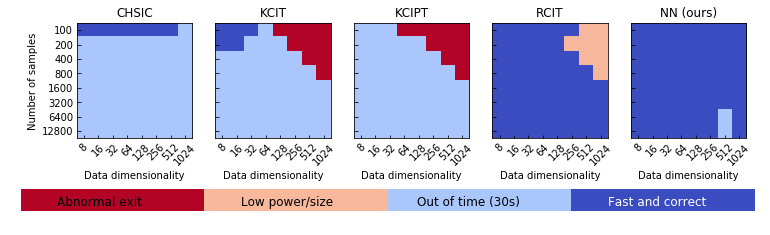

In [102]:
fig = plt.figure(figsize=(12, 3), facecolor='white')
cmap = plt.get_cmap('coolwarm_r')
cmap.set_bad('black',1.)
cmap.set_under('white', 1.)

ax = plt.subplot(1, 5, 1)
plt.title('CHSIC')
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM, rotation=45)
plt.ylabel('Number of samples')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], N_SAMPLES)
ax.tick_params(direction='in')
plt.imshow(res_mats['chsic'], vmin=-2, vmax=1, cmap=cmap)

ax = plt.subplot(1, 5, 2)
plt.title('KCIT')
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM, rotation=45)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [])
ax.tick_params(direction='in')
plt.imshow(res_mats['kcit'], vmin=-2, vmax=1, cmap=cmap)

ax = plt.subplot(1, 5, 3)
plt.title('KCIPT')
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM, rotation=45)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [])
ax.tick_params(direction='in')
plt.imshow(res_mats['kcipt'], vmin=-2, vmax=1, cmap=cmap)

ax = plt.subplot(1, 5, 4)
plt.title('RCIT')
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM, rotation=45)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [])
ax.tick_params(direction='in')
plt.imshow(res_mats['rcit'], vmin=-2, vmax=1, cmap=cmap)

ax = plt.subplot(1, 5, 5)
plt.title('NN (ours)')
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM, rotation=45)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [])
ax.tick_params(direction='in')
plt.imshow(res_mats['nn'], vmin=-2, vmax=1, cmap=cmap)

ax = fig.add_axes([0.06, -.1, .85, .1])
plt.axis('off')
ax.add_patch(
    patches.Rectangle((0, 0), .25, 1, facecolor=cmap(0))
)
plt.text(0.05, 0.25, 'Abnormal exit', fontsize=12)

ax.add_patch(
    patches.Rectangle((.25, 0), .25, 1, facecolor=cmap(1/3.))
)
plt.text(0.3, 0.25, 'Low power/size', fontsize=12)

ax.add_patch(
    patches.Rectangle((.5, 0), .25, 1, facecolor=cmap(2/3.))
)
plt.text(0.54, 0.25, 'Out of time (30s)', fontsize=12)

ax.add_patch(
    patches.Rectangle((.75, 0), .25, 1, facecolor=cmap(1.))
)
plt.text(0.8, 0.25, 'Fast and correct', fontsize=12, color='white')

In [14]:
from independence_test.evaluation_settings import SAMPLE_NUMS, DSETS
from independence_test.utils import pc_ks
DSET_NAME = 'discrete'
RES_FNAME = '../saved_data/{}_results.pkl'.format(DSET_NAME)
res = joblib.load(RES_FNAME)
res_mats = {}
for method in ['chsic', 'kcit', 'nn']:
    for key in res.keys():
        pval_d = np.array(res[key])[:, 0]
        pval_i = np.array(res[key])[:, 1]
        res_mats[key] = (pc_ks(pval_d)[0], pc_ks(pval_i)[1], np.median(pval_i), pc_ks(pval_i)[0])

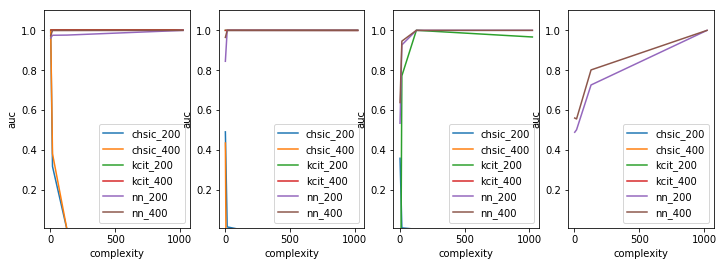

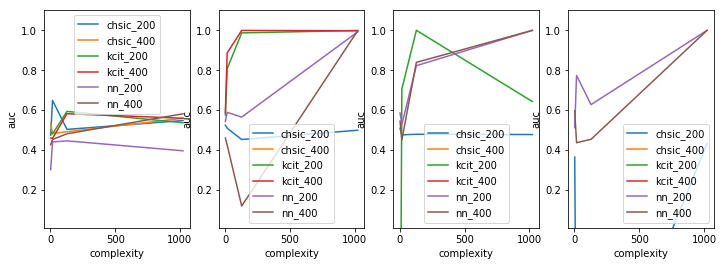

In [15]:
fig = plt.figure(figsize=(12,4), facecolor='white')
complexities = DSETS[DSET_NAME][1]
dimensionalities = DSETS[DSET_NAME][2]
for method_id, method in enumerate(['chsic', 'kcit', 'nn']):
    for n_samples_id, n_samples in enumerate([200, 400]):
        vals = np.zeros(len(complexities))
        for dim_id, dim in enumerate(dimensionalities):
            for cpl_id, cplxs in enumerate(complexities):
                key = '{}_{}_60mt_{}samples_{}dim_{}complexity'.format(
                    method, DSET_NAME, n_samples, dim, cplxs)
                vals[cpl_id] = res_mats[key][0]
            plt.subplot(1, len(dimensionalities), dim_id + 1)
            plt.plot(complexities, vals, '-', label='{}_{}'.format(method, n_samples))
            plt.xlabel('complexity')
            plt.ylabel('auc')
            plt.legend(loc='outside')
            plt.ylim([1e-2, 1.1])

            
fig = plt.figure(figsize=(12,4), facecolor='white')
complexities = DSETS[DSET_NAME][1]
dimensionalities = DSETS[DSET_NAME][2]
for method_id, method in enumerate(['chsic', 'kcit', 'nn']):
    for n_samples_id, n_samples in enumerate([200, 400]):
        vals = np.zeros(len(complexities))
        for dim_id, dim in enumerate(dimensionalities):
            for cpl_id, cplxs in enumerate(complexities):
                key = '{}_{}_60mt_{}samples_{}dim_{}complexity'.format(
                    method, DSET_NAME, n_samples, dim, cplxs)
                vals[cpl_id] = res_mats[key][3]
            plt.subplot(1, len(dimensionalities), dim_id + 1)
            plt.plot(complexities, vals, '-', label='{}_{}'.format(method, n_samples))
            plt.xlabel('complexity')
            plt.ylabel('auc')
            plt.legend(loc='outside')
            plt.ylim([1e-2, 1.1])
            
            
# for method_id, method in enumerate(['chsic', 'kcit', 'nn']):
#     for n_samples_id, n_samples in enumerate([200, 400]):
#         vals = np.zeros(3)
#         for cpl_id, cplxs in enumerate([.1, .3, .5]):
#             key = '{}_chaos_60mt_{}samples_1dim_{}complexity'.format(
#                 method, n_samples, cplxs)
#             vals[cpl_id] = res_mats[key][1]
#         plt.subplot(1, 3, 2)
#         plt.plot([.1, .3, .5], vals, '-', label=key[:-19])
#         plt.yscale('log')
#         plt.xlabel('gamma')
#         plt.ylabel('ks')
#         plt.legend(loc='outside')
        
# for method_id, method in enumerate(['chsic', 'kcit', 'nn']):
#     for n_samples_id, n_samples in enumerate([200, 400]):
#         vals = np.zeros(3)
#         for cpl_id, cplxs in enumerate([.1, .3, .5]):
#             key = '{}_chaos_60mt_{}samples_1dim_{}complexity'.format(
#                 method, n_samples, cplxs)
#             vals[cpl_id] = res_mats[key][2]
#         plt.subplot(1, 3, 3)
#         plt.plot([.1, .3, .5], vals, '-', label=key[:-19])
#         plt.ylim([0, 1])
#         plt.xlabel('gamma')
#         plt.ylabel('ks')
#         plt.legend(loc='outside')